In [1]:
import numpy as np
import pandas as pd
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L
from chainer.training import extensions

In [2]:
import sqlite3

In [171]:
dbname = 'db.sqlite3'
con = sqlite3.connect(dbname)
data_f_o = pd.read_sql('select * from history limit 1200000', con)
data_f_o

,id,side,price,size,exec_date,buy_child_order_acceptance_id,sell_child_order_acceptance_id
0,56779179,BUY,610389,0.079300,2017-10-13 00:24:08.750000,JRF20171013-002408-809416,JRF20171013-002408-367340
1,56779180,BUY,610389,0.001101,2017-10-13 00:24:09.157000,JRF20171013-002409-426360,JRF20171013-002408-367340
2,56779187,BUY,610389,0.200000,2017-10-13 00:24:10.670000,JRF20171013-002410-736735,JRF20171013-002408-367340
3,56779192,BUY,610389,0.031300,2017-10-13 00:24:11.703000,JRF20171013-002411-620852,JRF20171013-002408-367340
4,56779208,BUY,610389,0.056875,2017-10-13 00:24:12.530000,JRF20171013-002412-246215,JRF20171013-002408-367340
5,56779209,BUY,610390,0.583125,2017-10-13 00:24:12.530000,JRF20171013-002412-246215,JRF20171013-002407-683401
6,56779210,BUY,610390,0.400000,2017-10-13 00:24:12.717000,JRF20171013-092409-930835,JRF20171013-002407-683401
7,56779215,SELL,610389,0.010000,2017-10-13 00:24:13.750000,JRF20171013-002413-000251,JRF20171013-002413-000231
8,56779219,SELL,610091,0.173410,2017-10-13 00:24:14.517000,JRF20171013-002414-246222,JRF20171013-092408-514857
9,56779225,BUY,610200,0.001000,2017-10-13 00:24:15.953000,JRF20171013-092412-399648,JRF20171013-002413-000231


In [172]:
data_f = data_f_o[['id', 'price', 'size', 'exec_date']]

In [173]:
data_f.exec_date = pd.to_datetime(data_f.exec_date)
data_f = data_f.set_index('id')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [68]:
data_f

,price,size,exec_date
id,,,
56779179,610389,0.079300,2017-10-13 00:24:08.750
56779180,610389,0.001101,2017-10-13 00:24:09.157
56779187,610389,0.200000,2017-10-13 00:24:10.670
56779192,610389,0.031300,2017-10-13 00:24:11.703
56779208,610389,0.056875,2017-10-13 00:24:12.530
56779209,610390,0.583125,2017-10-13 00:24:12.530
56779210,610390,0.400000,2017-10-13 00:24:12.717
56779215,610389,0.010000,2017-10-13 00:24:13.750
56779219,610091,0.173410,2017-10-13 00:24:14.517


In [174]:
data_f = data_f[data_f.exec_date > '2000']

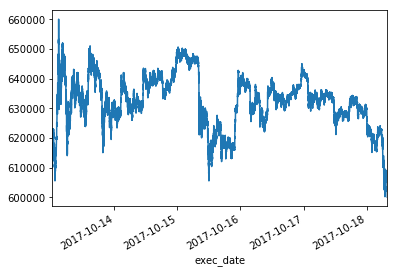

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
data_f.price.plot()

In [175]:
price = data_f.price

In [23]:
price.index[20000], price[20000]

(Timestamp('2017-10-13 03:56:35.543000'), 641900)

In [176]:
answer = price.shift(-20000) / price
answer

id
56779179    1.052183
56779180    1.052770
56779187    1.052770
56779192    1.052532
56779208    1.052768
56779209    1.052766
56779210    1.052185
56779215    1.052675
56779219    1.053190
56779225    1.053096
56779249    1.053097
56779252    1.053097
56779253    1.052248
56779254    1.052478
56779255    1.052309
56779265    1.052699
56779279    1.052332
56779280    1.053777
56779281    1.053874
56779283    1.053876
56779287    1.053872
56779288    1.052309
56779289    1.052048
56779290    1.052029
56779291    1.050741
56779292    1.050745
56779293    1.050738
56779294    1.050736
56779295    1.050736
56779296    1.050376
              ...   
64173426         NaN
64173450         NaN
64173452         NaN
64173456         NaN
64173457         NaN
64173463         NaN
64173465         NaN
64173466         NaN
64173467         NaN
64173468         NaN
64173469         NaN
64173470         NaN
64173475         NaN
64173476         NaN
64173477         NaN
64173484         NaN
64173489  

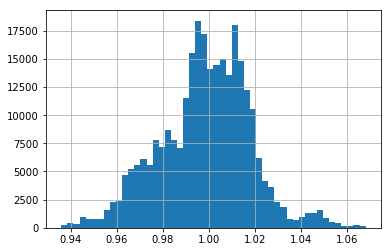

In [99]:
answer.hist(bins=50)

In [177]:
for s in range(1, 5):
    slide = s * 10000
    rolling = price.rolling(slide)
    data_f['mean_%d' % s] = rolling.mean() / price
    data_f['std_%d' % s] = rolling.std() / price
    data_f['max_%d' % s] = rolling.max() / price
    data_f['min_%d' % s] = rolling.min() / price
    data_f['med_%d' % s] = rolling.median() / price
data_f

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,mean_3,std_3,max_3,min_3,med_3,mean_4,std_4,max_4,min_4,med_4
id,,,,,,,,,,,,,,,,,,,,,
56779179,610389,0.079300,2017-10-13 00:24:08.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779180,610389,0.001101,2017-10-13 00:24:09.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779187,610389,0.200000,2017-10-13 00:24:10.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779192,610389,0.031300,2017-10-13 00:24:11.703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779208,610389,0.056875,2017-10-13 00:24:12.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779209,610390,0.583125,2017-10-13 00:24:12.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779210,610390,0.400000,2017-10-13 00:24:12.717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779215,610389,0.010000,2017-10-13 00:24:13.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779219,610091,0.173410,2017-10-13 00:24:14.517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
for s in range(1, 5):
    slide = s * 10000
    mean = price.rolling(slide).mean()
    data_f['rel_diff_%d' % s] = (price - mean) / price

In [94]:
data_f[data_f.med_4_diff.notnull()]

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,mean_4_diff,std_4_diff,max_4_diff,min_4_diff,med_4_diff,ewma_diff,rel_diff_1,rel_diff_2,rel_diff_3,rel_diff_4
id,,,,,,,,,,,,,,,,,,,,,
57019795,637663,0.697401,2017-10-13 08:38:26.663,0.990403,0.010274,1.008558,0.967596,0.989062,0.994766,0.014596,...,0.003070,-0.000404,0.002166,0.001987,0.003283,0.003181,0.009597,0.005234,0.001488,0.007444
57019801,637663,0.658600,2017-10-13 08:38:27.413,0.990406,0.010272,1.008558,0.967596,0.989072,0.994765,0.014595,...,0.003070,-0.000404,0.002166,0.001987,0.003281,0.003180,0.009594,0.005235,0.001488,0.007443
57019816,637664,0.104400,2017-10-13 08:38:29.337,0.990408,0.010270,1.008556,0.967594,0.989087,0.994763,0.014594,...,0.003065,-0.000404,0.002161,0.001982,0.003272,0.003175,0.009592,0.005237,0.001490,0.007444
57019841,637665,0.184700,2017-10-13 08:38:33.727,0.990410,0.010268,1.008555,0.967593,0.989111,0.994760,0.014593,...,0.003064,-0.000404,0.002161,0.001982,0.003268,0.003175,0.009590,0.005240,0.001492,0.007444
57019848,638234,1.096700,2017-10-13 08:38:35.103,0.989530,0.010257,1.007655,0.966730,0.988247,0.993872,0.014579,...,0.002179,-0.000419,0.001238,0.001136,0.002380,0.002289,0.010470,0.006128,0.002382,0.008328
57019849,637958,0.428000,2017-10-13 08:38:35.667,0.989961,0.010259,1.008091,0.967150,0.988675,0.994301,0.014585,...,0.002608,-0.000411,0.001685,0.001546,0.002809,0.002718,0.010039,0.005699,0.001950,0.007898
57019853,637959,0.300000,2017-10-13 08:38:36.323,0.989963,0.010257,1.008090,0.967148,0.988674,0.994299,0.014584,...,0.001851,-0.000424,0.000896,0.000822,0.002048,0.001961,0.010037,0.005701,0.001952,0.007899
57019856,637960,0.116600,2017-10-13 08:38:36.980,0.989965,0.010255,1.008088,0.968462,0.988673,0.994296,0.014583,...,0.002603,-0.000410,0.001681,0.001542,0.002799,0.002713,0.010035,0.005704,0.001954,0.007900
57019862,638233,0.001800,2017-10-13 08:38:37.730,0.989544,0.010249,1.007657,0.968048,0.988250,0.993870,0.014576,...,0.001425,-0.000431,0.000452,0.000415,0.001616,0.001534,0.010456,0.006130,0.002381,0.008323


In [179]:
ewma = pd.ewma(price, span=20000)
ewma

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20000,min_periods=0,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


id
56779179    610389.000000
56779180    610389.000000
56779187    610389.000000
56779192    610389.000000
56779208    610389.000000
56779209    610389.166708
56779210    610389.285786
56779215    610389.250050
56779219    610356.097898
56779225    610340.481083
56779249    610327.703689
56779252    610317.055861
56779253    610350.764088
56779254    610390.020730
56779255    610430.647773
56779265    610409.341316
56779279    610420.565507
56779280    610402.240745
56779281    610385.844906
56779283    610371.088652
56779287    610357.737755
56779288    610386.916655
56779289    610413.558258
56779290    610438.021441
56779291    610460.527569
56779292    610481.302455
56779293    610500.538460
56779294    610518.400464
56779295    610535.030604
56779296    610550.552068
                ...      
64173426    750857.899139
64173450    750859.579665
64173452    750861.218725
64173456    750862.857621
64173457    750864.496253
64173463    750866.133622
64173465    750867.770027
64173466 

In [180]:
data_f['ewma'] = ewma / price

In [181]:
data_fd = data_f.loc[:, 'mean_1':'ewma']
data_fd = data_fd - data_fd.shift(1000)
data_fd

,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,max_2,min_2,med_2,...,mean_4,std_4,max_4,min_4,med_4,rel_diff_1,rel_diff_2,rel_diff_3,rel_diff_4,ewma
id,,,,,,,,,,,,,,,,,,,,,
56779179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
renamed = {name:(name + '_diff') for name in data_fd.columns}
renamed

{'ewma': 'ewma_diff',
 'max_1': 'max_1_diff',
 'max_2': 'max_2_diff',
 'max_3': 'max_3_diff',
 'max_4': 'max_4_diff',
 'mean_1': 'mean_1_diff',
 'mean_2': 'mean_2_diff',
 'mean_3': 'mean_3_diff',
 'mean_4': 'mean_4_diff',
 'med_1': 'med_1_diff',
 'med_2': 'med_2_diff',
 'med_3': 'med_3_diff',
 'med_4': 'med_4_diff',
 'min_1': 'min_1_diff',
 'min_2': 'min_2_diff',
 'min_3': 'min_3_diff',
 'min_4': 'min_4_diff',
 'rel_diff_1': 'rel_diff_1_diff',
 'rel_diff_2': 'rel_diff_2_diff',
 'rel_diff_3': 'rel_diff_3_diff',
 'rel_diff_4': 'rel_diff_4_diff',
 'std_1': 'std_1_diff',
 'std_2': 'std_2_diff',
 'std_3': 'std_3_diff',
 'std_4': 'std_4_diff'}

In [183]:
data_fd = data_fd.rename(columns=renamed)
data_fd

,mean_1_diff,std_1_diff,max_1_diff,min_1_diff,med_1_diff,mean_2_diff,std_2_diff,max_2_diff,min_2_diff,med_2_diff,...,mean_4_diff,std_4_diff,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff
id,,,,,,,,,,,,,,,,,,,,,
56779179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
data_f = pd.concat([data_f, data_fd], axis=1)
data_f

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,mean_4_diff,std_4_diff,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff
id,,,,,,,,,,,,,,,,,,,,,
56779179,610389,0.079300,2017-10-13 00:24:08.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779180,610389,0.001101,2017-10-13 00:24:09.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779187,610389,0.200000,2017-10-13 00:24:10.670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779192,610389,0.031300,2017-10-13 00:24:11.703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779208,610389,0.056875,2017-10-13 00:24:12.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779209,610390,0.583125,2017-10-13 00:24:12.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779210,610390,0.400000,2017-10-13 00:24:12.717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779215,610389,0.010000,2017-10-13 00:24:13.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56779219,610091,0.173410,2017-10-13 00:24:14.517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
data_size = data_f.loc[:, 'mean_1':'ewma_diff'].shape
data_size

(1196056, 50)

In [205]:
data_f['ans'] = answer
df = data_f[data_f.med_4_diff.notnull() & data_f.ans.notnull()].sample(10000)
d_exp = df.loc[:, 'mean_1':'ewma_diff']
d_obj = df[['ans']]

In [206]:
d_obj

,ans
id,
58009824,0.973261
59735144,0.991519
62269483,1.010951
60716008,1.024278
57491397,1.005108
58385682,0.995816
58386732,0.992839
61524204,1.027236
62583074,1.013662


In [197]:
d_obj['small'] = d_obj.ans <= 0.99
d_obj['large'] = d_obj.ans >= 1.01
d_obj['val'] = d_obj['small'] * 1 + d_obj['large'] * 2
d_obj = d_obj[['val']]
d_obj

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,val
id,
63751480,0
58009931,1
60914050,1
57878364,2
57789017,1
63761004,0
62104754,1
61050020,1
57942874,0


In [198]:
data = np.array(d_exp, dtype=np.float32)
f_names = np.array(d_exp.columns)
t_data = np.array(d_obj.val, dtype=np.int32)
t_names = np.array(['non', 'down', 'up'])

In [199]:
t_data.shape, data.shape

((10000,), (10000, 50))

In [200]:
row, col = data_size

ls_1 = 500
ls_2 = 1000
ls_3 = 200
out_size = 3
class MyChain(Chain):
    def __init__(self):
        super().__init__(
            l1=L.Linear(col, ls_1),
            l2=L.Linear(ls_1, ls_2),
            l3=L.Linear(ls_2, ls_3),
            l4=L.Linear(ls_3, out_size)
        )
    
    def __call__(self, x):
        h1 = F.sigmoid(self.l1(x))
        h2 = F.sigmoid(self.l2(h1))
        h3 = F.sigmoid(self.l3(h2))
        o = self.l4(h3)
        return o

In [201]:
train = datasets.tuple_dataset.TupleDataset(data, t_data)
train = iterators.SerialIterator(train, batch_size=100, shuffle=True, repeat=True)

In [202]:
model = L.Classifier(MyChain())
optimizer = optimizers.SGD()
optimizer.setup(model)
updater = training.StandardUpdater(train, optimizer)

In [148]:
trainer = training.Trainer(updater, (10, 'epoch'), out='result')
#精度確認
# trainer.extend(extensions.Evaluator(test_iter, model))
#レポート出力
trainer.extend(extensions.LogReport())
#レポート内容
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'validation/main/accuracy']))
#プログレスバー出力
trainer.extend(extensions.ProgressBar())
#モデルの保存
# trainer.extend(extensions.snapshot(trigger=(1, 'epoch'), filename='snapshot_iter_{0:04d}'))

In [150]:
!pip install chaineripy

In [151]:
from chaineripy.extensions import PrintReport, ProgressBar

In [203]:
trainer = training.Trainer(updater, (10, 'epoch'), out='result')
#精度確認
# trainer.extend(extensions.Evaluator(test_iter, model))
#レポート出力
trainer.extend(extensions.LogReport())
# print the statistics to a IPython widget
trainer.extend(PrintReport(
    ['epoch', 'main/loss', 'validation/main/loss',
     'main/accuracy', 'validation/main/accuracy', 'elapsed_time']))
# show the progress bar on a IPython widget
trainer.extend(ProgressBar(update_interval=10))

In [160]:
trainer.run()

In [204]:
trainer.run()

In [161]:
serializers.save_npz('model_02.npz', model)

In [262]:
data_f['ans'] = (answer - 1) * 100
df = data_f[data_f.med_4_diff.notnull() & data_f.ans.notnull()].sample(10000)
d_exp = df.loc[:, 'mean_1':'ewma_diff']
d_obj = df[['ans']]
data = np.array(d_exp, dtype=np.float32)
f_names = np.array(d_exp.columns)
t_data = np.array(d_obj, dtype=np.float32)
t_names = np.array(['non', 'down', 'up'])
data_size = d_exp.shape

In [263]:
row, col = data_size

ls_1 = 500
ls_2 = 1000
ls_3 = 200
out_size = 1
class MyChainR(Chain):
    def __init__(self):
        super().__init__(
            l1=L.Linear(col, ls_1),
            l2=L.Linear(ls_1, ls_2),
            l3=L.Linear(ls_2, ls_3),
            l4=L.Linear(ls_3, out_size)
        )
    
    def __call__(self, *args):
        o = self.forward(args[0])
        t = args[1]
        self.loss = F.mean_squared_error(o, t)
        report({'loss': self.loss}, self)
        return self.loss
    
    def forward(self, x):
        h1 = F.sigmoid(self.l1(x))
        h2 = F.sigmoid(self.l2(h1))
        h3 = F.sigmoid(self.l3(h2))
        return self.l4(h3)

In [266]:
train = datasets.tuple_dataset.TupleDataset(data, t_data)
train = iterators.SerialIterator(train, batch_size=100, shuffle=True, repeat=True)
model = MyChainR()
optimizer = optimizers.SGD()
optimizer.setup(model)
updater = training.StandardUpdater(train, optimizer)

trainer = training.Trainer(updater, (100, 'epoch'), out='result')
#精度確認
# trainer.extend(extensions.Evaluator(test_iter, model))
#レポート出力
trainer.extend(extensions.LogReport())
# print the statistics to a IPython widget
trainer.extend(PrintReport(
    ['epoch', 'main/loss', 'validation/main/loss',
     'main/accuracy', 'validation/main/accuracy', 'elapsed_time']))
# show the progress bar on a IPython widget
trainer.extend(ProgressBar(update_interval=10))

In [ ]:
trainer.run()

In [256]:
df = data_f[data_f.med_4_diff.notnull() & data_f.ans.notnull()].sample(100)
d_exp = df.loc[:, 'mean_1':'ewma_diff']
d_obj = df[['ans']]
data = np.array(d_exp, dtype=np.float32)
t_data = np.array(d_obj, dtype=np.float32)

In [257]:
df

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,std_4_diff,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff,ans
id,,,,,,,,,,,,,,,,,,,,,
63861603,726792,2.000000,2017-11-01 07:00:46.503,0.997220,0.002720,1.001566,0.990655,0.998159,0.996017,0.003396,...,-0.000407,-0.003255,0.003397,-0.002517,0.003158,0.002705,0.002744,0.002468,-0.002813,0.024242
58804473,601450,0.016700,2017-10-18 12:13:45.710,0.992726,0.009172,1.013709,0.974462,0.992601,0.996798,0.009363,...,-0.000767,-0.008347,-0.007099,-0.010740,0.007893,0.008027,0.008281,0.008742,-0.007265,0.009562
59601316,677324,1.000000,2017-10-20 16:59:47.653,0.988812,0.005361,1.002548,0.980328,0.987521,0.980181,0.012665,...,0.000687,-0.000624,-0.002880,0.001071,0.001648,0.000538,0.000970,0.001442,-0.000866,0.009856
62387602,651728,0.300000,2017-10-27 22:48:01.210,0.998914,0.004524,1.009470,0.988392,0.998971,0.999072,0.004417,...,-0.000249,0.004002,0.003829,0.003413,-0.003864,-0.003948,-0.003058,-0.003399,0.004005,-0.003141
59065346,635000,1.000000,2017-10-19 04:07:19.987,0.993403,0.004519,1.000170,0.980299,0.994175,0.989464,0.006307,...,-0.001388,-0.004878,0.002251,0.007956,0.003570,0.003385,0.003441,0.002359,-0.003620,0.005339
62338531,650010,0.019204,2017-10-27 18:10:30.443,1.002867,0.003674,1.011323,0.991466,1.003246,1.006137,0.007456,...,-0.000100,0.001998,0.003024,0.001399,-0.003492,-0.001919,-0.002605,-0.002104,0.002077,0.005523
61812889,651900,0.033900,2017-10-26 11:00:13.320,0.992234,0.004324,1.000494,0.982896,0.992049,0.992687,0.004032,...,-0.000806,-0.001032,0.001148,-0.000400,0.000830,0.000456,0.000378,-0.000316,-0.000294,0.030712
63230038,680699,0.600001,2017-10-30 13:18:49.200,1.007405,0.007934,1.022478,0.994654,1.005634,1.009321,0.006796,...,0.000097,0.000376,0.000365,0.000072,0.001706,-0.000105,0.000252,-0.000022,-0.000283,0.007539
59056731,632640,0.061048,2017-10-19 03:30:01.543,0.994885,0.005487,1.003901,0.983261,0.995827,0.990399,0.009006,...,-0.000743,-0.006778,-0.006094,-0.005400,0.006504,0.004842,0.005100,0.004493,-0.005647,0.008472


In [243]:
data[0]

array([  1.01989210e+00,   7.96781294e-03,   1.03158677e+00,
         1.00000000e+00,   1.02148759e+00,   1.02642417e+00,
         1.01825474e-02,   1.04780161e+00,   1.00000000e+00,
         1.02644622e+00,   1.03105915e+00,   1.07935695e-02,
         1.04846120e+00,   1.00000000e+00,   1.03112149e+00,
         1.03340518e+00,   1.07338568e-02,   1.05160332e+00,
         1.00000000e+00,   1.03608263e+00,  -1.98920965e-02,
        -2.64241174e-02,  -3.10591757e-02,  -3.34052071e-02,
         1.02441955e+00,   6.48218160e-03,   2.01681070e-03,
         8.45562946e-03,   0.00000000e+00,   7.02039013e-03,
         6.35329820e-03,   6.11539872e-04,   7.93443993e-03,
         0.00000000e+00,   7.40365824e-03,   7.38315471e-03,
         1.27324206e-03,   8.59394390e-03,   0.00000000e+00,
         4.40017600e-03,   7.41165783e-03,   9.54010000e-04,
         8.61969963e-03,   0.00000000e+00,   8.09657946e-03,
        -6.48218160e-03,  -6.35329820e-03,  -7.38315471e-03,
        -7.41165783e-03,

In [258]:
res = model.forward(data)
res

In [246]:
res.shape

(100, 1)

In [247]:
type(res)

chainer.variable.Variable

In [259]:
dfs = df
dfs['res'] = res.data
dfs

,price,size,exec_date,mean_1,std_1,max_1,min_1,med_1,mean_2,std_2,...,max_4_diff,min_4_diff,med_4_diff,rel_diff_1_diff,rel_diff_2_diff,rel_diff_3_diff,rel_diff_4_diff,ewma_diff,ans,res
id,,,,,,,,,,,,,,,,,,,,,
63861603,726792,2.000000,2017-11-01 07:00:46.503,0.997220,0.002720,1.001566,0.990655,0.998159,0.996017,0.003396,...,-0.003255,0.003397,-0.002517,0.003158,0.002705,0.002744,0.002468,-0.002813,0.024242,0.002210
58804473,601450,0.016700,2017-10-18 12:13:45.710,0.992726,0.009172,1.013709,0.974462,0.992601,0.996798,0.009363,...,-0.008347,-0.007099,-0.010740,0.007893,0.008027,0.008281,0.008742,-0.007265,0.009562,0.002341
59601316,677324,1.000000,2017-10-20 16:59:47.653,0.988812,0.005361,1.002548,0.980328,0.987521,0.980181,0.012665,...,-0.000624,-0.002880,0.001071,0.001648,0.000538,0.000970,0.001442,-0.000866,0.009856,0.002082
62387602,651728,0.300000,2017-10-27 22:48:01.210,0.998914,0.004524,1.009470,0.988392,0.998971,0.999072,0.004417,...,0.004002,0.003829,0.003413,-0.003864,-0.003948,-0.003058,-0.003399,0.004005,-0.003141,0.002350
59065346,635000,1.000000,2017-10-19 04:07:19.987,0.993403,0.004519,1.000170,0.980299,0.994175,0.989464,0.006307,...,-0.004878,0.002251,0.007956,0.003570,0.003385,0.003441,0.002359,-0.003620,0.005339,0.002181
62338531,650010,0.019204,2017-10-27 18:10:30.443,1.002867,0.003674,1.011323,0.991466,1.003246,1.006137,0.007456,...,0.001998,0.003024,0.001399,-0.003492,-0.001919,-0.002605,-0.002104,0.002077,0.005523,0.002399
61812889,651900,0.033900,2017-10-26 11:00:13.320,0.992234,0.004324,1.000494,0.982896,0.992049,0.992687,0.004032,...,-0.001032,0.001148,-0.000400,0.000830,0.000456,0.000378,-0.000316,-0.000294,0.030712,0.002201
63230038,680699,0.600001,2017-10-30 13:18:49.200,1.007405,0.007934,1.022478,0.994654,1.005634,1.009321,0.006796,...,0.000376,0.000365,0.000072,0.001706,-0.000105,0.000252,-0.000022,-0.000283,0.007539,0.002316
59056731,632640,0.061048,2017-10-19 03:30:01.543,0.994885,0.005487,1.003901,0.983261,0.995827,0.990399,0.009006,...,-0.006778,-0.006094,-0.005400,0.006504,0.004842,0.005100,0.004493,-0.005647,0.008472,0.002151


In [260]:
df[df['ans'] > 0].shape

(61, 55)

In [261]:
df.ans.mean()

0.003797150015274826